In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- Gross income: gross income is all the money you earn before taxes and other deductions are subtracted.

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [60]:
total=(df['Unit price']*df['Quantity'])+df['Tax 5%']
total

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Length: 1000, dtype: float64

In [61]:
522.83*7

3659.8100000000004

In [62]:
522.8299999999999+(522.8299999999999*(5/100))

548.9714999999999

In [63]:
#  Gross Margin % = (Revenue – Cost of Goods Sold) / Revenue x 100
gross_Margin=(df['Total']- df['cogs'])/df['Total']*(100)
gross_Margin


0      4.761905
1      4.761905
2      4.761905
3      4.761905
4      4.761905
         ...   
995    4.761905
996    4.761905
997    4.761905
998    4.761905
999    4.761905
Length: 1000, dtype: float64

In [64]:
df.shape

(1000, 17)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [66]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [67]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [68]:
df['City']

0         Yangon
1      Naypyitaw
2         Yangon
3         Yangon
4         Yangon
         ...    
995    Naypyitaw
996     Mandalay
997       Yangon
998       Yangon
999       Yangon
Name: City, Length: 1000, dtype: object

In [69]:
for i in df:
    if df[i].dtype=='object':
        print(i,'.......',df[i].dtype)

Invoice ID ....... object
Branch ....... object
City ....... object
Customer type ....... object
Gender ....... object
Product line ....... object
Date ....... object
Time ....... object
Payment ....... object


In [3]:
# find object variables in dataset

obj= [i for i in df if df[i].dtype=='object']

print('The object variables are :',obj)

The object variables are : ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [4]:
# find numerical variables in dataset

numerical = [col for col in df if df[col].dtype!='object']

print('The numerical variables are :', numerical)

The numerical variables are : ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [72]:
df1=df

# Categorical Variables

In [73]:
# for i in obj:
   
#     if i!='Invoice ID' and i!='Date' and i!='Time':
#         print('columns',i)
#         print('no of unique in',i, 'is', df[i].nunique())
#         print('these are the unique in', i, df[i].unique())

In [123]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [74]:
for i in obj:
    if i!='Invoice ID' and i!='Date' and i!='Time':
        print(i,'...',df[i].nunique(),'......',df[i].unique())
        print(i,'.........',df[i].value_counts())


Branch ... 3 ...... ['A' 'C' 'B']
Branch ......... A    340
B    332
C    328
Name: Branch, dtype: int64
City ... 3 ...... ['Yangon' 'Naypyitaw' 'Mandalay']
City ......... Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Customer type ... 2 ...... ['Member' 'Normal']
Customer type ......... Member    501
Normal    499
Name: Customer type, dtype: int64
Gender ... 2 ...... ['Female' 'Male']
Gender ......... Female    501
Male      499
Name: Gender, dtype: int64
Product line ... 6 ...... ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Product line ......... Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Payment ... 3 ...... ['Ewallet' 'Cash' 'Credit card']
Payment ......... Ewallet        345
Cash           344
Credi

In [75]:
print("The count of unique values in City variable is ",df['City'].nunique())
print("The unique values in City variable are ",df['City'].unique())

The count of unique values in City variable is  3
The unique values in City variable are  ['Yangon' 'Naypyitaw' 'Mandalay']


In [76]:
print("The count of unique values in Customertype variable is ",df['Customer type'].nunique())
print("The unique values in Customertype variable are ",df['Customer type'].unique())

The count of unique values in Customertype variable is  2
The unique values in Customertype variable are  ['Member' 'Normal']


In [77]:
print("The count of unique values in Gender variable is ",df['Gender'].nunique())
print("The unique values in Gender variable are ",df['Gender'].unique())

The count of unique values in Gender variable is  2
The unique values in Gender variable are  ['Female' 'Male']


In [78]:
print("The count of unique values in Payment variable is ",df['Payment'].nunique())
print("The unique values in Payment variable are ",df['Payment'].unique())

The count of unique values in Payment variable is  3
The unique values in Payment variable are  ['Ewallet' 'Cash' 'Credit card']


In [79]:
print("The count of unique values in Productline variable is ",df['Product line'].nunique())
print("The unique values in Productline variable are ",df['Product line'].unique())

The count of unique values in Productline variable is  6
The unique values in Productline variable are  ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [7]:
df[obj].head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet


In [5]:
z=df.select_dtypes(include='object')
z.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet


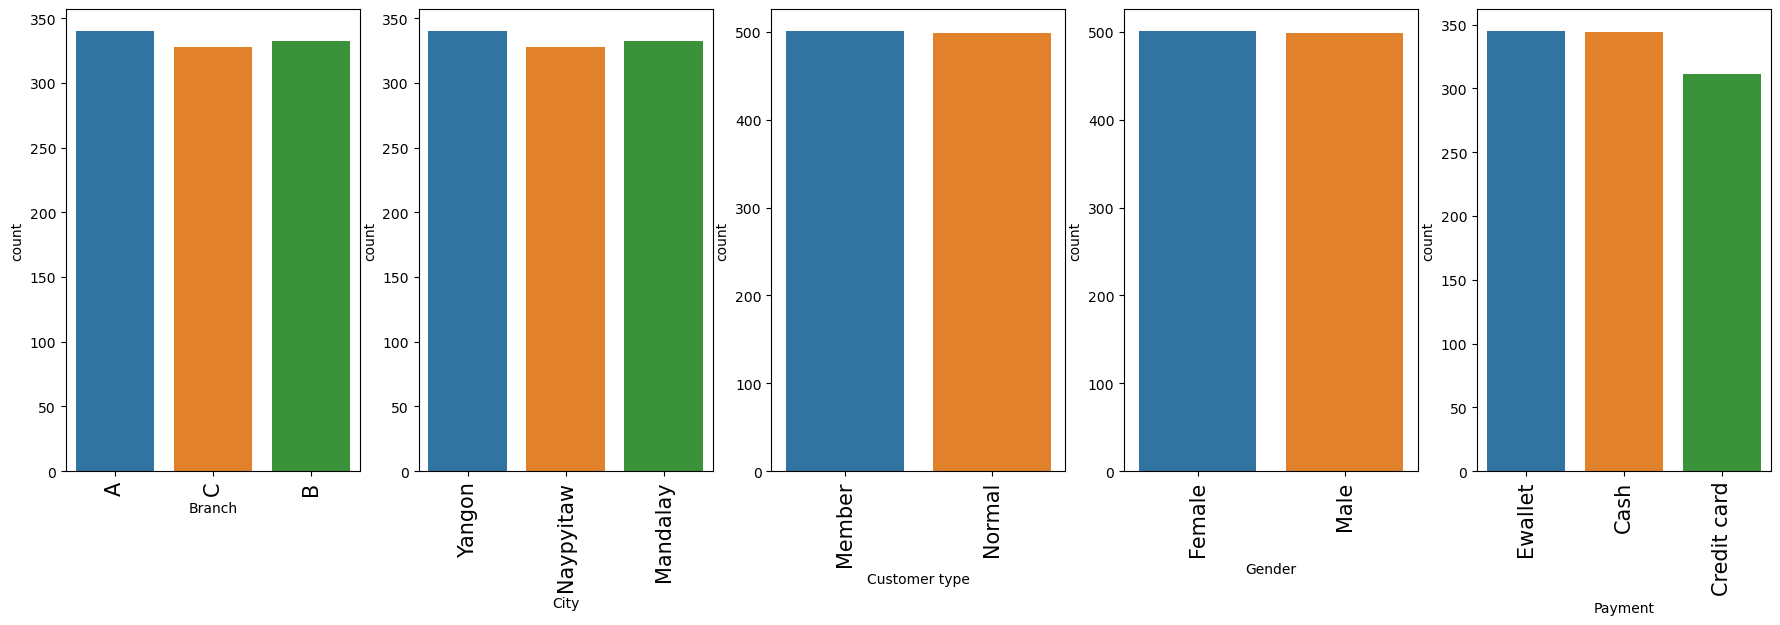

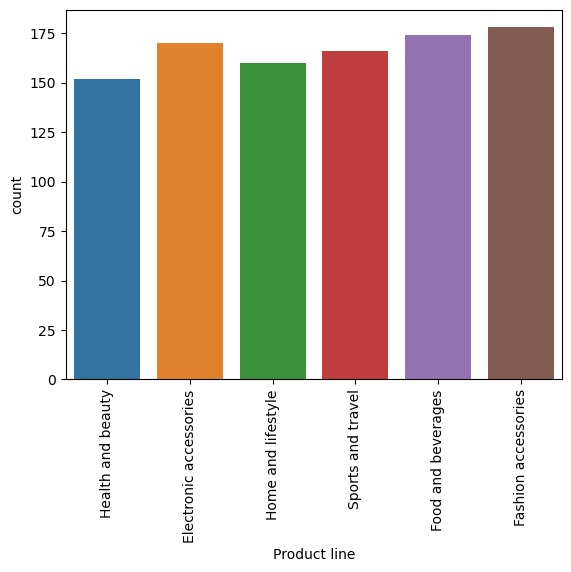

In [81]:
plt.figure(figsize=(22,6))
c=1
for i in z:
    if i!='Invoice ID' and i!='Date' and i!='Time' and i!='Product line':
        
        plt.subplot(1,5,c)
        sns.countplot(x = z[i], data = z)
        plt.xticks(rotation=90,fontsize=15)
        c=c+1 # c+=1
plt.show()

sns.countplot(x = z['Product line'],data = z)
plt.xticks(rotation=90);
        

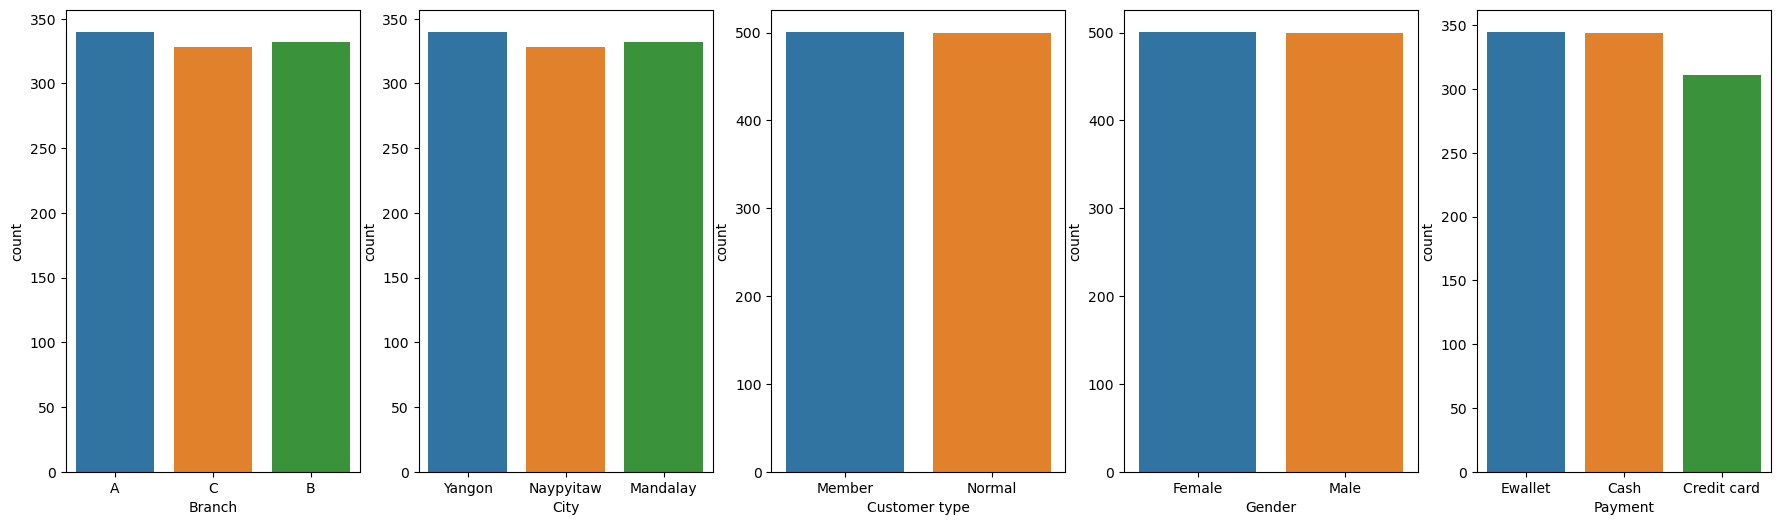

In [82]:
plt.figure(figsize=(22,6))
plt.subplot(1,5,1)
sns.countplot(x = 'Branch', data = df1)
plt.subplot(1,5,2)
sns.countplot(x = 'City', data = df1)
plt.subplot(1,5,3)
sns.countplot(x = 'Customer type', data = df1)
plt.subplot(1,5,4)
sns.countplot(x = 'Gender', data = df1)
plt.subplot(1,5,5)
sns.countplot(x = 'Payment', data = df1)

plt.show()

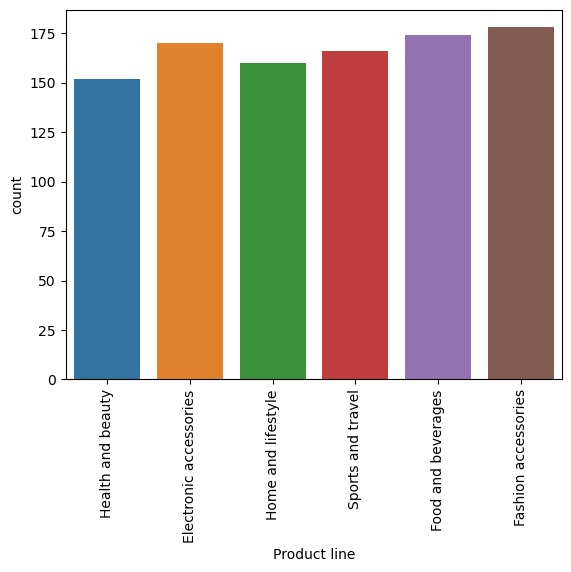

In [83]:
sns.countplot(x = 'Product line', data = df1)
plt.xticks(rotation=90);

## Analyzing the data

##### WHICH IS THE BEST PRODUCT LINE FOR EACH BRANCH ?

In [84]:
df1=df.copy()

In [85]:
pd.pivot_table(df1, index = 'Product line', columns = 'Branch' ,values = 'gross income' ,aggfunc =['count','mean'])


count               mean                      
Branch                     A   B   C          A          B          C
Product line                                                         
Electronic accessories    60  55  55  14.537392  14.763155  16.423355
Fashion accessories       51  62  65  15.249775  12.606234  15.794923
Food and beverages        58  50  66  14.091216  14.490370  17.147803
Health and beauty         47  53  52  12.763681  17.952075  15.215500
Home and lifestyle        65  50  45  16.422854  16.713490  14.704289
Sports and travel         59  62  45  15.635754  15.351919  16.679289

In [31]:
a=df.groupby(['Product line','Branch'])['gross income'].agg(['count','mean'])
a

count       mean
Product line           Branch                  
Electronic accessories A          60  14.537392
                       B          55  14.763155
                       C          55  16.423355
Fashion accessories    A          51  15.249775
                       B          62  12.606234
                       C          65  15.794923
Food and beverages     A          58  14.091216
                       B          50  14.490370
                       C          66  17.147803
Health and beauty      A          47  12.763681
                       B          53  17.952075
                       C          52  15.215500
Home and lifestyle     A          65  16.422854
                       B          50  16.713490
                       C          45  14.704289
Sports and travel      A          59  15.635754
                       B          62  15.351919
                       C          45  16.679289

In [30]:
a['gross income'].mean()

Product line            Branch
Electronic accessories  A         14.537392
                        B         14.763155
                        C         16.423355
Fashion accessories     A         15.249775
                        B         12.606234
                        C         15.794923
Food and beverages      A         14.091216
                        B         14.490370
                        C         17.147803
Health and beauty       A         12.763681
                        B         17.952075
                        C         15.215500
Home and lifestyle      A         16.422854
                        B         16.713490
                        C         14.704289
Sports and travel       A         15.635754
                        B         15.351919
                        C         16.679289
Name: gross income, dtype: float64

In [29]:
a['Branch'].count()

Product line            Branch
Electronic accessories  A         60
                        B         55
                        C         55
Fashion accessories     A         51
                        B         62
                        C         65
Food and beverages      A         58
                        B         50
                        C         66
Health and beauty       A         47
                        B         53
                        C         52
Home and lifestyle      A         65
                        B         50
                        C         45
Sports and travel       A         59
                        B         62
                        C         45
Name: Branch, dtype: int64

In [38]:
k=df.groupby(['Product line','Branch'])['gross income'].agg(['count','mean']).reset_index()
k

,Product line,Branch,count,mean
0,Electronic accessories,A,60,14.537392
1,Electronic accessories,B,55,14.763155
2,Electronic accessories,C,55,16.423355
3,Fashion accessories,A,51,15.249775
4,Fashion accessories,B,62,12.606234
5,Fashion accessories,C,65,15.794923
6,Food and beverages,A,58,14.091216
7,Food and beverages,B,50,14.490370
8,Food and beverages,C,66,17.147803
9,Health and beauty,A,47,12.763681


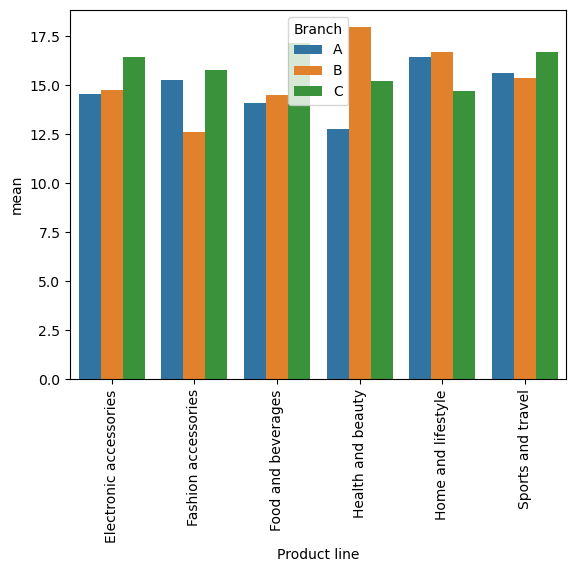

In [39]:
sns.barplot(x='Product line',y='mean',hue='Branch',data=k)
plt.xticks(rotation=90);

In [90]:
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Insigth 1 :WHICH IS THE BEST SELLING BRANCH ?

In [132]:
l=df.groupby(['Branch'])['gross income'].sum().reset_index()
l

,Branch,gross income
0,A,5057.1605
1,B,5057.0320
2,C,5265.1765


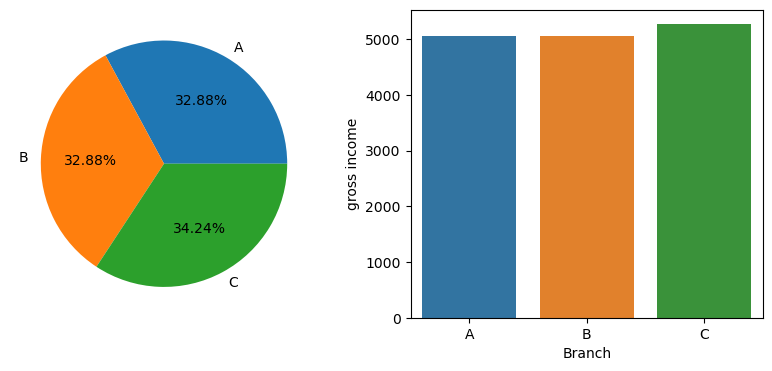

In [138]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie('gross income',labels='Branch',data=l,autopct='%0.2f%%')
plt.subplot(1,2,2)
sns.barplot(x='Branch',y='gross income',data=l);

### Insight 2:WHICH BRANCH HAS HIGH RATING?

In [147]:
u=df.groupby(['Branch'])['Rating'].mean().reset_index()
u

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


C:\Users\verma\AppData\Local\Temp\ipykernel_18776\3221578756.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Branch',y='Rating',ci=None,data=u);


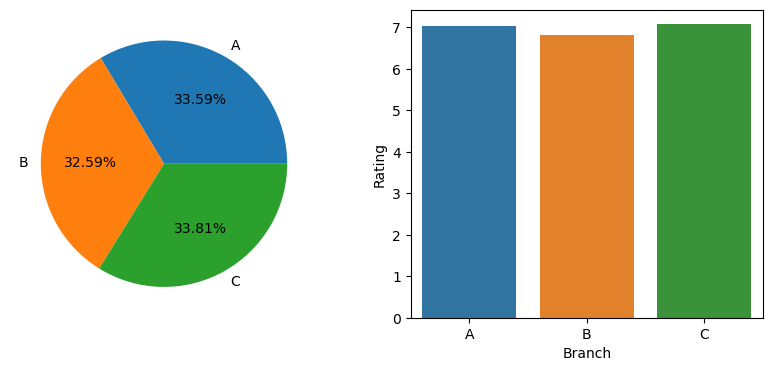

In [149]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.pie('Rating',labels='Branch',data=u,autopct='%0.2f%%')
plt.subplot(1,2,2)
sns.barplot(x='Branch',y='Rating',ci=None,data=u);

so the branch c is the most branch have a high gross income and high rating so we select this branch to analysis it and create dataframe

In [40]:
c=df[df['Branch']=='C']
c

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2/6/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9


### insights 3: classify gross income based on customer type?

In [100]:
c.groupby(['Customer type'])['gross income'].sum().reset_index()


,Customer type,gross income
0,Member,2708.6325
1,Normal,2556.5440


In [101]:
c['Customer type'].value_counts()

Member    169
Normal    159
Name: Customer type, dtype: int64

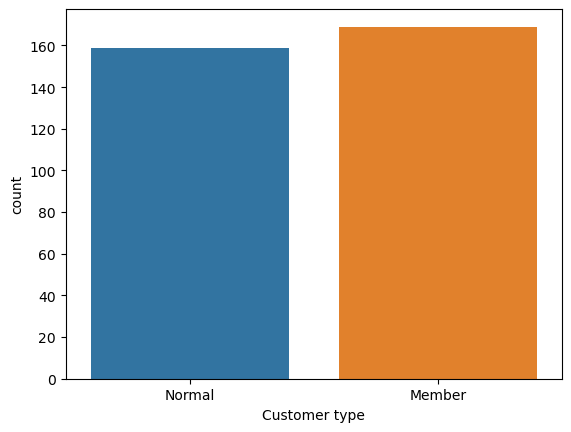

In [103]:
sns.countplot(x='Customer type',data=c);

In [12]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


### Insight 4: Which day has most gross income ?

In [41]:
df['Date']=pd.to_datetime(df['Date'])


In [42]:
df['Days']=df['Date'].dt.day_name()

In [43]:
df['month']=df['Date'].dt.month_name()

In [44]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday,February


In [111]:
df['Days'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [159]:
df['Weeks']=df['Days'].apply(lambda a :'Weekday' if a=='Monday' or a=='Tuesday' or a=='Wednesday'or a=='Thursday' or a=='Friday' else 'Weekend')

In [160]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,month,Weeks
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,Weekend
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,Weekday


In [161]:
df.groupby(['Weeks'])['gross income'].sum()

Weeks
Weekday    10589.907
Weekend     4789.462
Name: gross income, dtype: float64

In [50]:
i=df.groupby(['month','Days'])['gross income'].sum().reset_index().sort_values(by='gross income',ascending=False)
i

,month,Days,gross income
16,March,Saturday,1227.1870
12,January,Tuesday,1009.7385
11,January,Thursday,924.5895
9,January,Saturday,861.6040
13,January,Wednesday,848.0180
19,March,Tuesday,838.6350
0,February,Friday,800.1090
3,February,Sunday,791.9515
14,March,Friday,757.3600
10,January,Sunday,683.6550


In [45]:
df.groupby('month')['gross income'].sum().reset_index().sort_values(by='gross income',ascending=False)

,month,gross income
1,January,5537.708
2,March,5212.167
0,February,4629.494


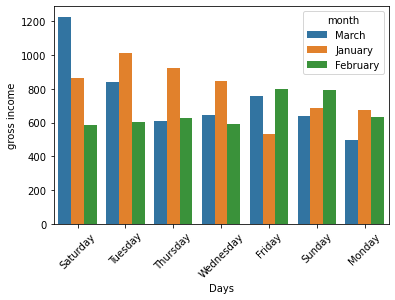

In [46]:
sns.barplot(x='Days',y='gross income',hue='month',data=i)
plt.xticks(rotation=45);

### Insight 5 :what mode of payment is high ?

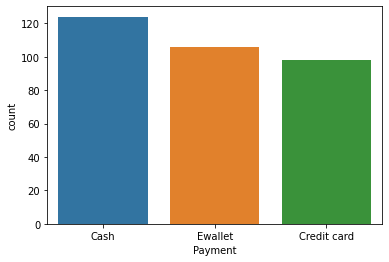

In [47]:
sns.countplot(x='Payment',data=c);


In [48]:
c['Payment'].value_counts()

Cash           124
Ewallet        106
Credit card     98
Name: Payment, dtype: int64

In [31]:
df1.groupby(['Gender','Customer type'])['gross income'].sum()

Gender  Customer type
Female  Member           4197.4735
        Normal           3796.9515
Male    Member           3622.6905
        Normal           3762.2535
Name: gross income, dtype: float64

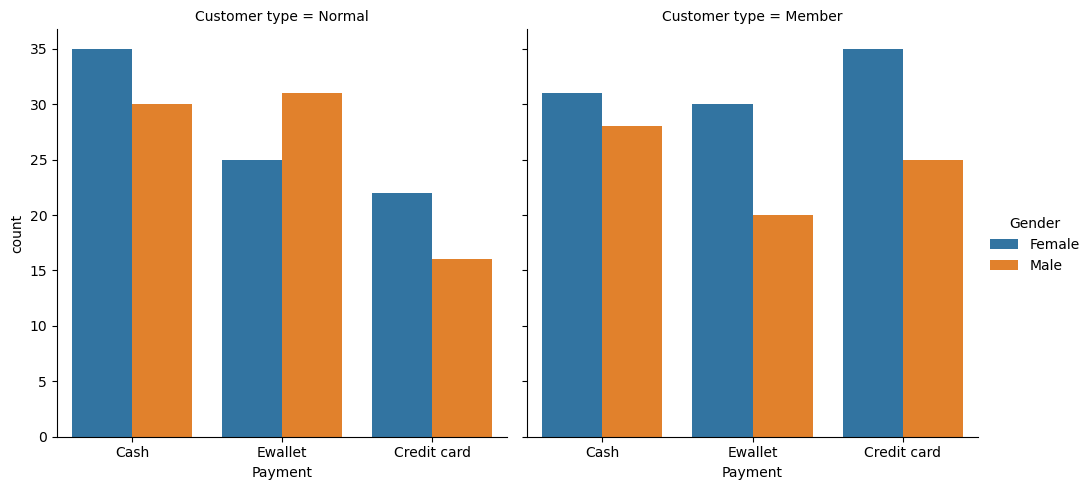

In [52]:
sns.catplot(x='Payment',hue='Gender',kind='count',col='Customer type',data=c);
 

### Insights 6:calculate the gross income with respect to product line

In [42]:
Products=c.groupby(['Product line'])['gross income'].sum().reset_index()
Products

,Product line,gross income
0,Electronic accessories,903.2845
1,Fashion accessories,1026.6700
2,Food and beverages,1131.7550
3,Health and beauty,791.2060
4,Home and lifestyle,661.6930
5,Sports and travel,750.5680


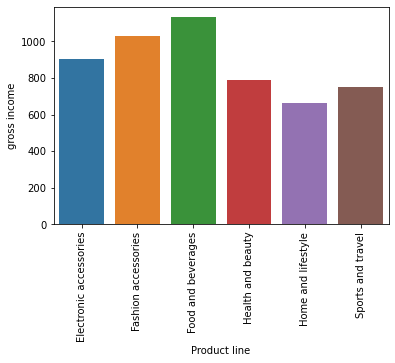

In [21]:
sns.barplot(x='Product line',y='gross income',data=Products);
plt.xticks(rotation=90);

### Insights 7: Availability of product

In [44]:
c['Product line'].value_counts(normalize=True)*100

Food and beverages        20.121951
Fashion accessories       19.817073
Electronic accessories    16.768293
Health and beauty         15.853659
Home and lifestyle        13.719512
Sports and travel         13.719512
Name: Product line, dtype: float64

In [45]:
c_index=c['Product line'].value_counts().index
c_index

Index(['Food and beverages', 'Fashion accessories', 'Electronic accessories',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
      dtype='object')

In [46]:
c_values=c['Product line'].value_counts().values
c_values

array([66, 65, 55, 52, 45, 45], dtype=int64)

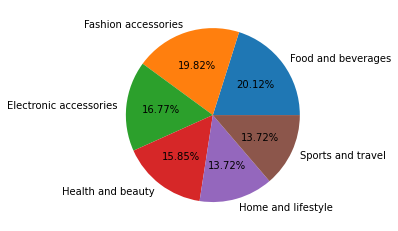

In [47]:
plt.pie(c_values,labels=c_index,autopct='%.2f%%')
plt.show()

In [ ]:
s='restartt'
# resta###

In [52]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-10-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January


In [53]:
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [55]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,month,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-10-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,13


Text(0, 0.5, 'Quantity')

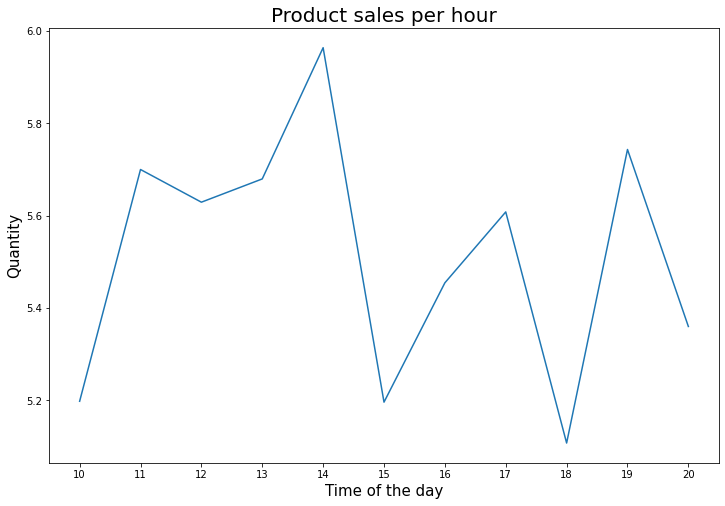

In [65]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=df,ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.xticks(df['Hour'].unique())
# plt.yticks(df['Quantity'].unique())
plt.ylabel('Quantity', fontsize=15)

INSIGHTS: We can see that the sales is highest at 2pm. Good volume of sales is recorded around 5pm and 7pm. The sales is recorded to be the lowest around 10pm, 3pm and 4pm.

Text(0, 0.5, 'Quantity')

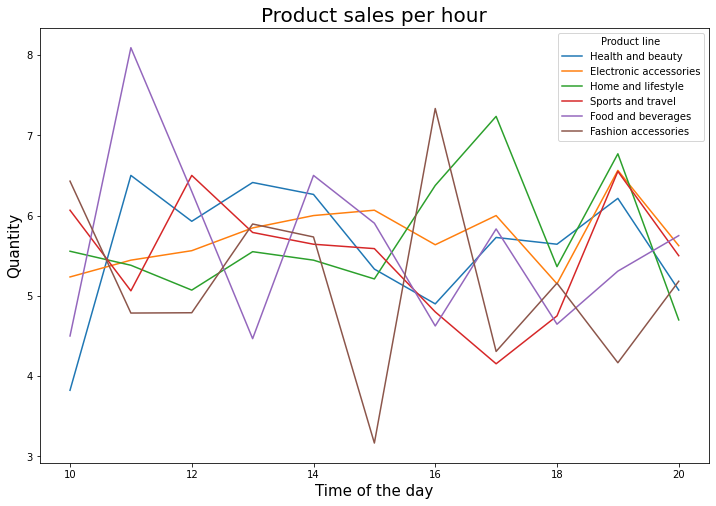

In [74]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Hour',y='Quantity',data=df, hue='Product line',ci=None)
plt.title('Product sales per hour', fontsize=20)
plt.xlabel('Time of the day', fontsize=15)
plt.ylabel('Quantity', fontsize=15)

Health and Beauty products has no specific time of purchase Electronic sales are seen around 7 pm which is the end of daily work, when family can enjoy such shopping. Home and lifestyle is recorded around 5 pm and 7 pm which can be an ideal time for homemakers to make such purchases. Food and beverages are seen to be purchased more at 11 am which is an ideal time to purchase daily or weekly food items. Fashion accessories are seen to be purchased at 4 pm which can be an ideal time not only for adults but also for teenagers.